Модель линейной регрессии

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [14]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [16]:
print(data.isnull().sum()) #поиск наличия нулевых значений в датасете

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [17]:
data['Species'].value_counts() #проверка возможного дисбаланса классов

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

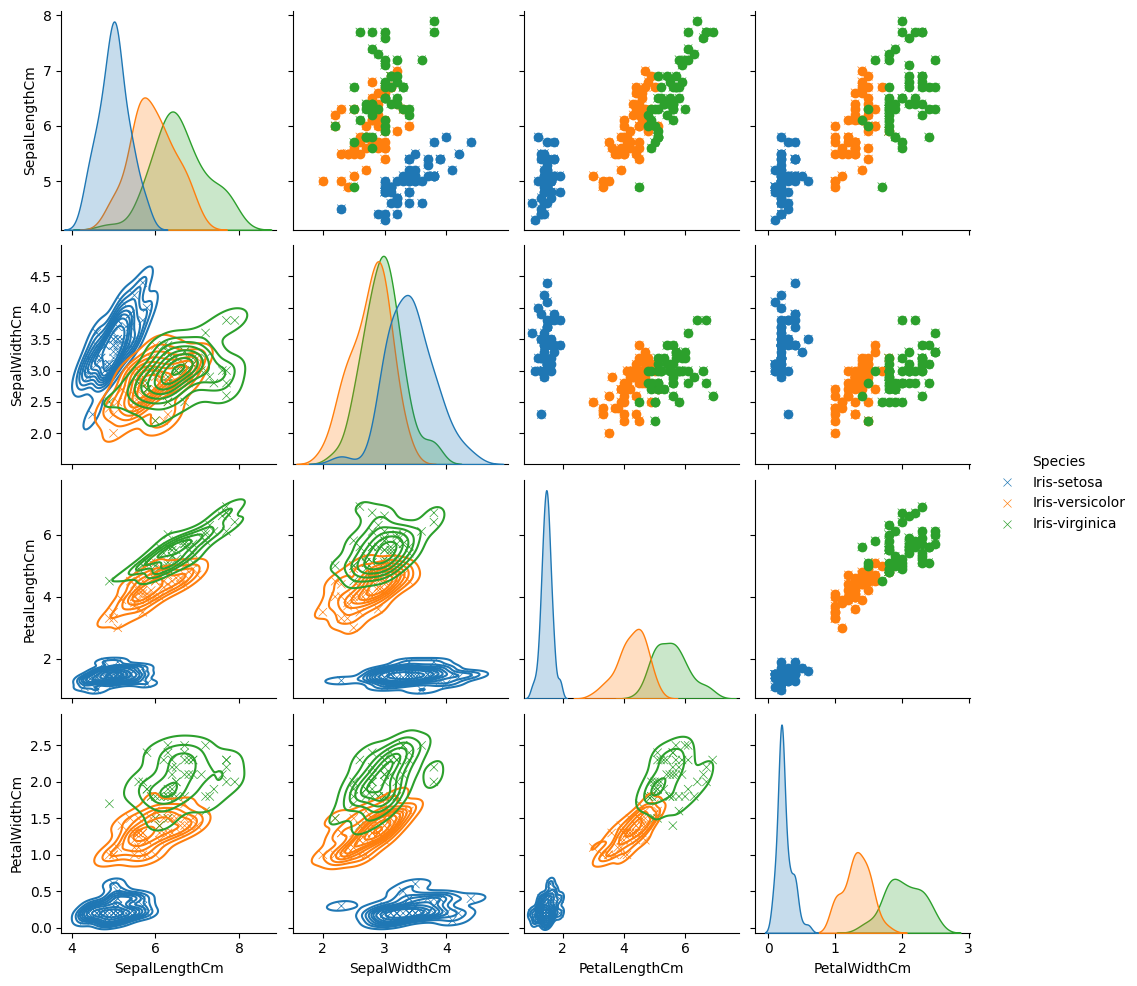

In [18]:
snsdata = data.drop(['Id'], axis=1)
g = sns.pairplot(snsdata, hue='Species', markers='x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

Выберем для бинарной классификации классы Versicolor и Virginica, т.к. они наименее различимы (что видно из диаграмм) 

In [19]:
data_for_binary = data.drop(index=data.index[data['Species'] == 'Iris-setosa'])
data_for_binary['Species'].replace({'Iris-versicolor':0, 'Iris-virginica':1}, inplace = True)
data_for_binary.head

C:\Users\Анна\AppData\Local\Temp\ipykernel_3540\3282195276.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_for_binary['Species'].replace({'Iris-versicolor':0, 'Iris-virginica':1}, inplace = True)
C:\Users\Анна\AppData\Local\Temp\ipykernel_3540\3282195276.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
50    51            7.0           3.2            4.7           1.4        0
51    52            6.4           3.2            4.5           1.5        0
52    53            6.9           3.1            4.9           1.5        0
53    54            5.5           2.3            4.0           1.3        0
54    55            6.5           2.8            4.6           1.5        0
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3        1
146  147            6.3           2.5            5.0           1.9        1
147  148            6.5           3.0            5.2           2.0        1
148  149            6.2           3.4            5.4           2.3        1
149  150            5.9           3.0            5.1           1.8        1

[100 rows x 6 columns]>

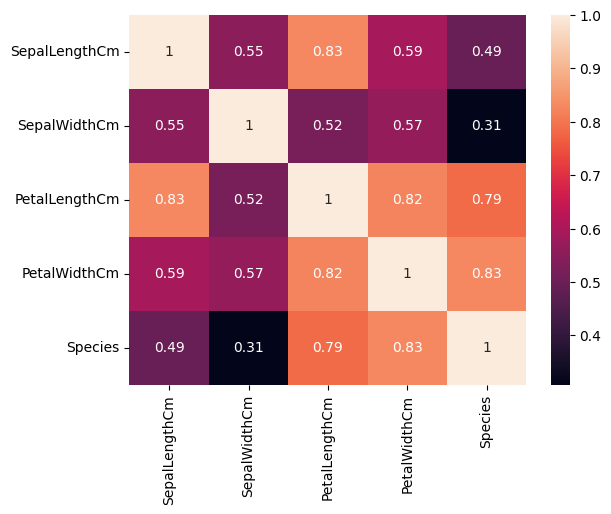

In [20]:
heatmapdata = data_for_binary.drop(['Id'], axis=1)
dataplot = sns.heatmap(heatmapdata.corr(numeric_only=True), annot=True)
plt.show()

In [21]:
X = data_for_binary[['PetalLengthCm', 'PetalWidthCm']] #отбираем признаки, наиболее скореллированные с видом по матрице корреляции
y = data_for_binary['Species']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred_lin = lin_reg.predict(X_test)
y_pred_class_lin = (y_pred_lin >= 0.5).astype(int) #порог для разделения классов
print(y_pred_class_lin)

[0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]


In [24]:
accuracy_lin = accuracy_score(y_test, y_pred_class_lin)
precision_lin = precision_score(y_test, y_pred_class_lin)
recall_lin = recall_score(y_test, y_pred_class_lin)

print(f"Линейная регрессия - Accuracy: {accuracy_lin:.2f}")
print(f"Линейная регрессия - Precision: {precision_lin:.2f}")
print(f"Линейная регрессия - Recall: {recall_lin:.2f}")

Линейная регрессия - Accuracy: 0.95
Линейная регрессия - Precision: 1.00
Линейная регрессия - Recall: 0.88


Модель линейной регрессии, различающая класс Setosa от двух других

In [25]:
data_for_binary2 = data
data_for_binary2['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':1}, inplace = True)

C:\Users\Анна\AppData\Local\Temp\ipykernel_3540\87041399.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_for_binary2['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':1}, inplace = True)
C:\Users\Анна\AppData\Local\Temp\ipykernel_3540\87041399.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_

In [26]:
X = data_for_binary2.drop(['Id', 'Species'], axis=1)
y = data_for_binary2['Species']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred_lin = lin_reg.predict(X_test)
y_pred_class_lin = (y_pred_lin >= 0.5).astype(int)
print(y_pred_class_lin)

[1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0]


In [29]:
accuracy_lin = accuracy_score(y_test, y_pred_class_lin)
precision_lin = precision_score(y_test, y_pred_class_lin)
recall_lin = recall_score(y_test, y_pred_class_lin)

print(f"Линейная регрессия - Accuracy: {accuracy_lin:.2f}")
print(f"Линейная регрессия - Precision: {precision_lin:.2f}")
print(f"Линейная регрессия - Recall: {recall_lin:.2f}")

Линейная регрессия - Accuracy: 1.00
Линейная регрессия - Precision: 1.00
Линейная регрессия - Recall: 1.00


Модель логистической регрессии, отличающая классы Versicolor и Virginica

In [30]:
data_for_binary_log = data.drop(index=data.index[data['Species'] == 'Iris-setosa'])
data_for_binary_log['Species'].replace({'Iris-versicolor':0, 'Iris-virginica':1}, inplace = True)
data_for_binary_log.head
X = data_for_binary_log.drop(['Id', 'Species'], axis=1)
y = data_for_binary_log['Species']

C:\Users\Анна\AppData\Local\Temp\ipykernel_3540\3765843808.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_for_binary_log['Species'].replace({'Iris-versicolor':0, 'Iris-virginica':1}, inplace = True)


In [31]:
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0])

In [32]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)
lr_y_pred = lr.predict(X_test)

In [33]:
accuracy_log = accuracy_score(y_test, lr_y_pred)
precision_log = precision_score(y_test, lr_y_pred)
recall_log = recall_score(y_test, lr_y_pred)

print(f"Логистическая регрессия - Accuracy: {accuracy_log:.2f}")
print(f"Логистическая регрессия - Precision: {precision_log:.2f}")
print(f"Логистическая регрессия - Recall: {recall_log:.2f}")

Логистическая регрессия - Accuracy: 1.00
Логистическая регрессия - Precision: 1.00
Логистическая регрессия - Recall: 1.00
